# Table of Contents
- [Data](#Data)
    - Loading the dataset
    - Pre-processing the data
    - Visualizing the First 21 Training Images
    
    
- [Implementation](#Implementation)
    - Without transfer learning
    - With transfert learning

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from tools import *

In [2]:
# Test if the GPU are being used (shoulf output non empty list)
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/gpu:0']

# Data
---

## Loading the dataset

The data used to train the classifier comes from the [INRIA person dataset](http://pascal.inrialpes.fr/data/human/), or VOC2012

Direct link: [download](ftp://ftp.inrialpes.fr/pub/lear/douze/data/INRIAPerson.tar)  (970MBB tar file)

In [3]:
# load train and test datasets
train_files, train_targets, classes = load_dataset('INRIAPerson/Train/')
test_files,  test_targets,  classes = load_dataset('INRIAPerson/Test/')

In [4]:
# Statistics about the dataset
print('Classes:', classes)
print('Total images \t\t: ', len(np.hstack([train_files, test_files])))
print('Training images \t: ', len(train_files))
print('Test images \t\t: ', len(test_files))

Classes: ['neg', 'pos']
Total images 		:  2573
Training images 	:  1832
Test images 		:  741


## Visualising the data

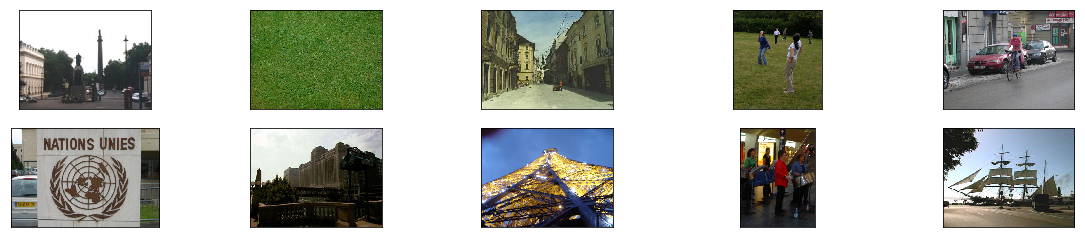

In [5]:
show_examples(train_files, number=10)

## Pre-processing the data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape:

$$
(\text{nb_samples}, \ \text{rows}, \ \text{columns}, \ \text{channels})
$$

- `nb_samples` = total number of images (or samples)
- `rows`, `columns`, `channels` = number of rows, columns, channels for each image, respectively 

In [6]:
train_tensors = paths_to_tensor(train_files)
test_tensors  = paths_to_tensor(test_files)

100%|██████████| 741/741 [00:08<00:00, 84.07it/s]


# Implementation
---

## Without transfer learning

### Model

The architecture used here (recomanded by Keras for [classification with little data](https://blog.keras.io/index.html)) consists in a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers. With the exception of ReLU, this is similar to the architectures that Yann LeCun advocated in the 1990s for image classification.

- We use `ReLU` activation functions to solve the vanishing gradient problem.
- We use `MaxPooling` to reduce the dimentionality after each convolution layer.
- We finish with two dense layers. The last layer has 133 nodes since there are 133 possible categories.
- Since we are constructing a multi-class classification we use `softmax` as the activation function of the last dense layer. 
- We use [L2 regularization](https://keras.io/regularizers/) and [Batch Normalization](https://keras.io/layers/normalization/) to tackle overfitting.

In [30]:
import model_from_scratch_4

model_name = 'model_from_scratch_4'
model = model_from_scratch_4.get_model(nb_classes=len(classes), summary=False)

### Training

In [31]:
history = train(model, model_name, train_tensors, train_targets, epochs=60, batch_size=35, verbose=0)


Epoch 00001: val_loss improved from inf to 5.02319, saving model to saved_models/model_from_scratch_3_dropout.hdf5

Epoch 00002: val_loss improved from 5.02319 to 0.68725, saving model to saved_models/model_from_scratch_3_dropout.hdf5

Epoch 00003: val_loss improved from 0.68725 to 0.62629, saving model to saved_models/model_from_scratch_3_dropout.hdf5

Epoch 00004: val_loss did not improve

Epoch 00005: val_loss did not improve

Epoch 00006: val_loss did not improve

Epoch 00007: val_loss did not improve

Epoch 00008: val_loss did not improve

Epoch 00009: val_loss improved from 0.62629 to 0.62246, saving model to saved_models/model_from_scratch_3_dropout.hdf5

Epoch 00010: val_loss did not improve

Epoch 00011: val_loss did not improve

Epoch 00012: val_loss improved from 0.62246 to 0.62194, saving model to saved_models/model_from_scratch_3_dropout.hdf5

Epoch 00013: val_loss did not improve

Epoch 00014: val_loss did not improve

Epoch 00015: val_loss did not improve

Epoch 00016: 

KeyboardInterrupt: 

### Evaluation

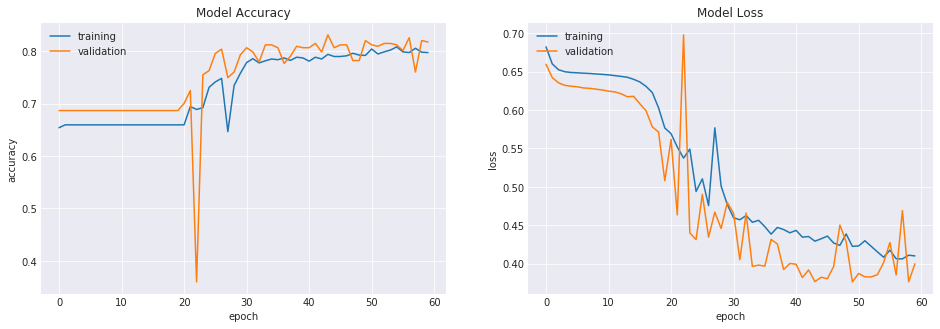

In [11]:
from IPython.display import Image
try:
    learning_curves(history, 'saved_models/' + model_name + '.png')
except NameError:
    img = Image(filename='saved_models/' + model_name + '.png') 
    display(img)

In [12]:
# Loading the model with the best validation loss
model.load_weights('saved_models/' + model_name + '.hdf5')

compute_accuracy(model, test_tensors, test_targets)

Test accuracy: 77.3279%


'INRIAPerson/Test/pos/person_and_bike_049.png'

not human


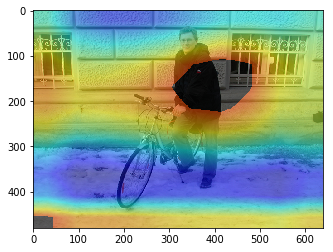

'INRIAPerson/Test/pos/person_336.png'

not human


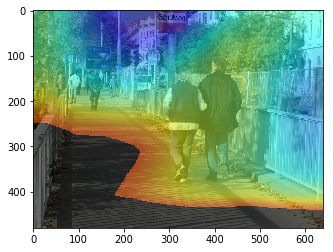

'INRIAPerson/Test/neg/D2004-04-11_13h54m18s.jpg'

not human


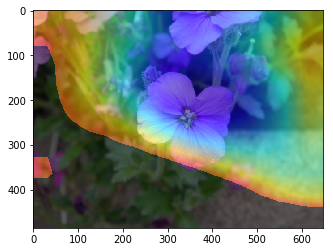

'INRIAPerson/Test/neg/D2004-11-09_11h24m12s.jpg'

not human


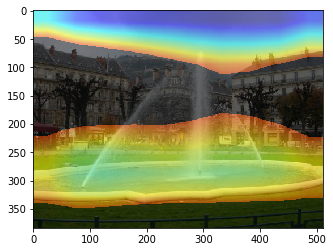

'INRIAPerson/Test/pos/crop001555.png'

not human


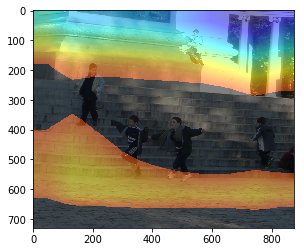

'INRIAPerson/Test/neg/D2004-07-09_22h25m11s.jpg'

not human


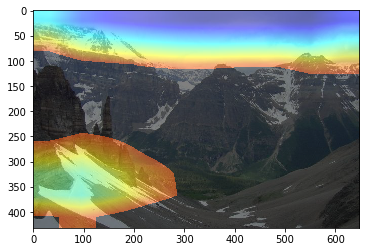

'INRIAPerson/Test/neg/00001386.png'

not human


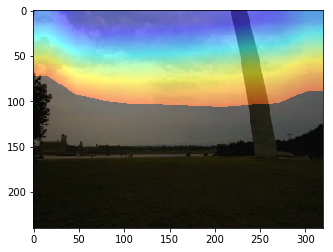

'INRIAPerson/Test/neg/00001166.png'

not human


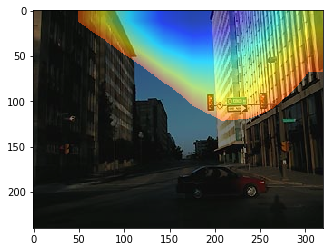

'INRIAPerson/Test/pos/person_325.png'

human


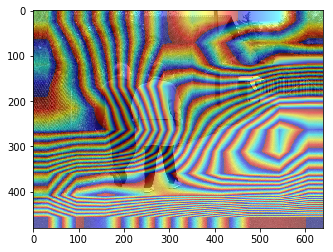

'INRIAPerson/Test/neg/00001194.png'

not human


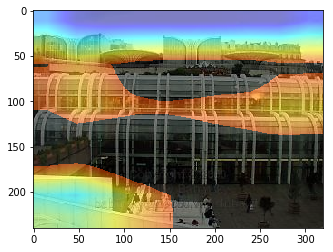

In [27]:
quick_test(model, test_files, 10, "final_conv_layer", "dense_layer")